# Import Necessary Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.datasets import load_iris

# Part1: Dataset Loading, Exploration & Preprocessing

In [8]:
# 1. Load the Iris dataset.
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first 10 rows.
print(iris_df.head(10))

# 2. Check for missing values.
print(iris_df.isnull().sum())
# imputation for numerical features:
for column in iris_df.select_dtypes(include=np.number).columns:
    iris_df[column] = iris_df[column].fillna(iris_df[column].mean())

# imputation for categorical features:
for column in iris_df.select_dtypes(include=['object']).columns:
    iris_df[column] = iris_df[column].fillna(iris_df[column].mode()[0])


# 3. Select target as the target variable (y) and all other columns as the input features (X).
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# 4. Scale the input features using StandardScaler class from sklearn library.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

# Part2: Linear Kernel SVM

Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


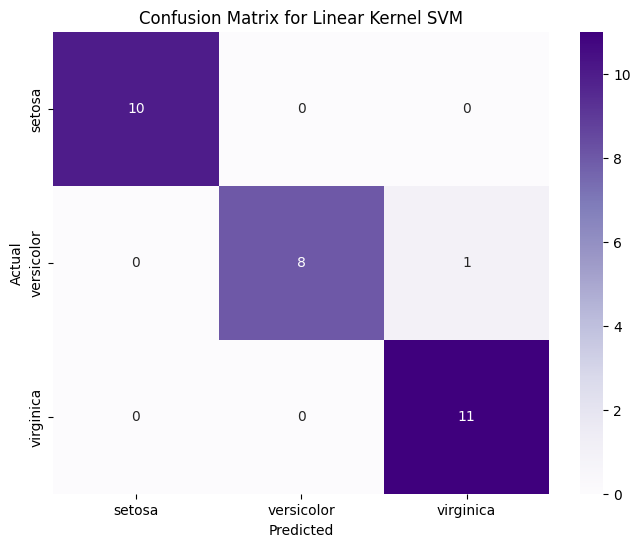

In [12]:
# 1. Implement a Support Vector Machine classifier using the linear kernel.
svm_classifier = SVC(kernel='linear')


# 2. Fit the model to the training data.
svm_classifier.fit(X_train, y_train)


# 3. Predict the target values for the test set.
y_pred = svm_classifier.predict(X_test)


# 4. Calculate and display the accuracy and confusion matrix for the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# 5. Visualize the confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Kernel SVM')
plt.show()


# Part3: RBF Kernel SVM

Accuracy (RBF Kernel): 1.0
Confusion Matrix (RBF Kernel):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


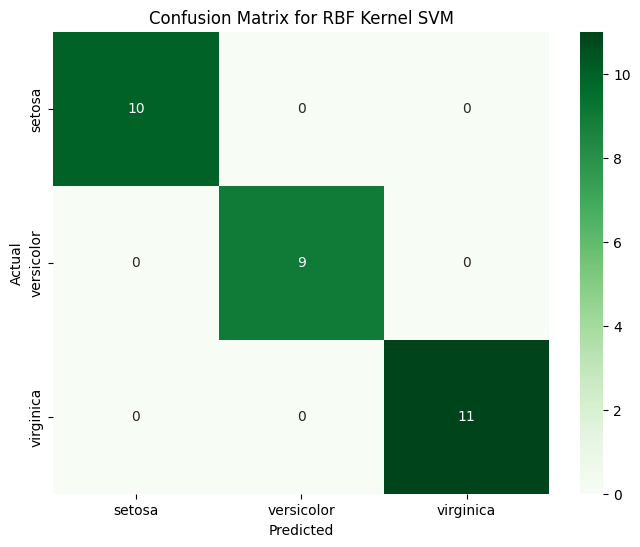

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy (Linear Kernel): 0.9666666666666667
Accuracy (RBF Kernel): 1.0
RBF kernel performs better than the Linear kernel in this case.


In [14]:
# 1. Implement an SVM with the radial basis function (RBF) kernel.
svm_rbf_classifier = SVC(kernel='rbf')

# 2. Fit the model to the training data.
svm_rbf_classifier.fit(X_train, y_train)

# 3. Predict the target values for the test set.
y_pred_rbf = svm_rbf_classifier.predict(X_test)

# 4. Calculate and display the accuracy and confusion matrix for the model.
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix (RBF Kernel):")
print(conf_matrix_rbf)

# 5. Visualize the confusion matrix for RBF kernel.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RBF Kernel SVM')
plt.show()


# 6. Compare the performance of the linear and RBF kernels.
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred))

print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

print(f"Accuracy (Linear Kernel): {accuracy}")
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")

if accuracy > accuracy_rbf:
  print("Linear kernel performs better than RBF kernel in this case.")
else:
  print("RBF kernel performs better than the Linear kernel in this case.")
